1. Draw a histogram showing the popularity of the main hashtags highlighting the number of tweets per individual hashtag and in another graph the number of distinct Tweet users per individual hashtag.

In [210]:
import pandas as pd
import ast

hashtags = ['ukrainewar', 'war', 'army', 'military', 'kiev', 'ua', 'specialforces', 'donbass', 'donbasswar', 'warukraine', 'russia', 'donetsk', 'soldiers', 'ukrainenews', 'odessa', 'ukrainianarmy', 'lviv', 'victory', 'nato', 'kyiv', 'militaryukraine']
tweets = pd.read_csv('tweets.csv')

dictOfhashtags = { i : 0 for i in hashtags }

for index, row in tweets.iterrows():
    for hashtag in ast.literal_eval(row.loc['hashtags']):
        if hashtag.lower() in dictOfhashtags:
            dictOfhashtags[hashtag.lower()] += 1

In [211]:
print(dictOfhashtags)

{'ukrainewar': 674, 'war': 485, 'army': 163, 'military': 152, 'kiev': 151, 'ua': 57, 'specialforces': 2, 'donbass': 173, 'donbasswar': 6, 'warukraine': 7, 'russia': 2830, 'donetsk': 107, 'soldiers': 13, 'ukrainenews': 5, 'odessa': 104, 'ukrainianarmy': 10, 'lviv': 44, 'victory': 31, 'nato': 952, 'kyiv': 211, 'militaryukraine': 0}


In [212]:
import matplotlib as mpl
from matplotlib import pyplot as plt


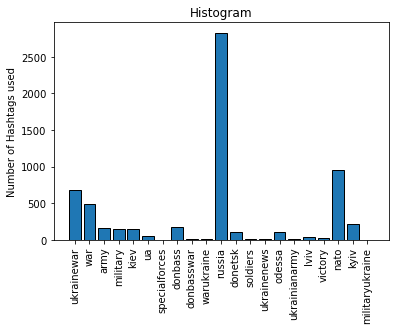

In [213]:



plt.bar(range(len(dictOfhashtags.keys())), dictOfhashtags.values(), edgecolor = 'black')


plt.title("Histogram")
plt.ylabel("Number of Hashtags used")

ax = plt.subplot()

ax.tick_params(axis = 'x', labelrotation = 90)
plt.xticks(range(len(dictOfhashtags.keys())), dictOfhashtags.keys())

plt.show()

In [214]:
dictOfhashtags = { i : [] for i in hashtags }

for index, row in tweets.iterrows():
    for hashtag in ast.literal_eval(row.loc['hashtags']):
        if hashtag.lower() in dictOfhashtags:
            if row.loc['username'] not in dictOfhashtags[hashtag.lower()]:
                dictOfhashtags[hashtag.lower()].append(row.loc['username'])

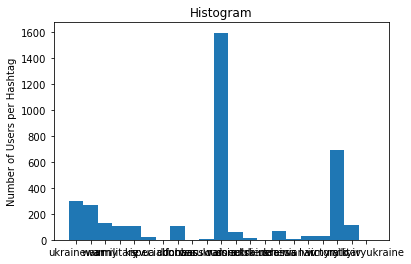

In [215]:
plt.bar(range(len(dictOfhashtags.keys())), [len(x) for x in dictOfhashtags.values()], 1)


plt.title("Histogram")
plt.ylabel("Number of Users per Hashtag")


plt.xticks(range(len(dictOfhashtags.keys())), dictOfhashtags.keys())

plt.show()

2. Draw pie chart illustrations showing regional location of the tweets associated to each of the above main hashtags using the location attribute of the tweet (whenever available).

In [222]:
from geopy.geocoders import Nominatim

def whereIs(s):

    geolocator = Nominatim(user_agent="WarTwitterAnalysis")
    location = geolocator.geocode(s)
    if location is None :
        return None
    return location.address



dictOfhashtags_location = { i : {} for i in hashtags }


for index, row in tweets.iterrows():
    for hashtag in ast.literal_eval(row.loc['hashtags']):
        if hashtag.lower() in dictOfhashtags_location:
            loc_string = row.loc['location']
            if type(loc_string) != type(0.1) : #check if the string is not nan(not a number)
                loc = whereIs(loc_string)
                if loc is not None : 
                    region = loc.rsplit(',', 1)[-1] 
                    if region[0] == ' ' :
                        region = region[1:]
                    #if region not in dictOfhashtags_location[hashtag.lower()]:

                        if region not in dictOfhashtags_location[hashtag.lower()].keys():
                            #dictOfhashtags_location[hashtag.lower()].append(region)
                            dictOfhashtags_location[hashtag.lower()][region] = 1
                        else:
                            dictOfhashtags_location[hashtag.lower()][region] += 1
                            
                        #dictOfhashtags_location[hashtag.lower()].append(region)
                        print(loc)
                        print(region)




United Nations, New York County, New York, United States
United States
West Yorkshire, Yorkshire and the Humber, England, United Kingdom
United Kingdom
Connecticut, United States
United States
Charlotte, Mecklenburg County, North Carolina, 28202, United States
United States
Universe, Grønvej, Elsmark, Svenstrup, Sønderborg Kommune, Region Syddanmark, 6430, Danmark
Danmark
Castel San Pietro, San Severino Marche, Macerata, Marche, Italia
Italia
Jammu and Kashmir, India
India
Ville de Bruxelles - Stad Brussel, Bruxelles - Brussel, Brussel-Hoofdstad - Bruxelles-Capitale, Région de Bruxelles-Capitale - Brussels Hoofdstedelijk Gewest, België / Belgique / Belgien
België / Belgique / Belgien
Earth, Lamb County, Texas, 79301, United States
United States
3rd Rock from the Sun, North Main Street, Roswell, Chaves County, New Mexico, 88201, United States
United States
Florida, United States
United States
Москва, Центральный федеральный округ, Россия
Россия
香港 Hong Kong, 中国
中国
New York, United State

GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=The+North+of+England&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))

In [223]:
print(dictOfhashtags_location)

{'ukrainewar': {'日本': 1, 'India': 1}, 'war': {'India': 1, 'United States': 2, 'Canada': 1, 'Україна': 1}, 'army': {'United States': 3, 'Colombia': 1}, 'military': {'United States': 7, 'United Kingdom': 1, 'France': 1}, 'kiev': {'Schweiz/Suisse/Svizzera/Svizra': 2}, 'ua': {}, 'specialforces': {}, 'donbass': {'日本': 1, 'Italia': 1}, 'donbasswar': {}, 'warukraine': {}, 'russia': {'United States': 15, 'United Kingdom': 4, 'Italia': 6, 'Россия': 2, '中国': 3, 'Azərbaycan': 1, '대한민국': 1, '日本': 2, 'India': 3, 'Deutschland': 3, 'España': 2, 'Canada': 3, 'Україна': 4, 'বাংলাদেশ': 1, 'België / Belgique / Belgien': 1, 'Australia': 1, 'ประเทศไทย': 3, 'الإمارات العربية المتحدة': 1, 'Polska': 2, 'Moldova': 1}, 'donetsk': {'India': 1}, 'soldiers': {}, 'ukrainenews': {}, 'odessa': {'Danmark': 1, 'Deutschland': 3, 'France': 1}, 'ukrainianarmy': {}, 'lviv': {}, 'victory': {'United States': 1}, 'nato': {'België / Belgique / Belgien': 1, 'United States': 6, 'Bosna i Hercegovina / Босна и Херцеговина': 1, 'Ук

C:\Users\adesa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 26085 missing from current font.

C:\Users\adesa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 26412 missing from current font.

C:\Users\adesa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning:

Glyph 26085 missing from current font.

C:\Users\adesa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning:

Glyph 26412 missing from current font.



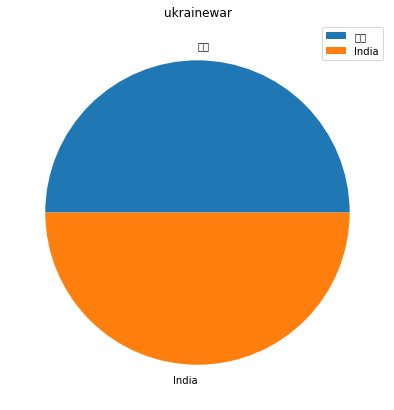

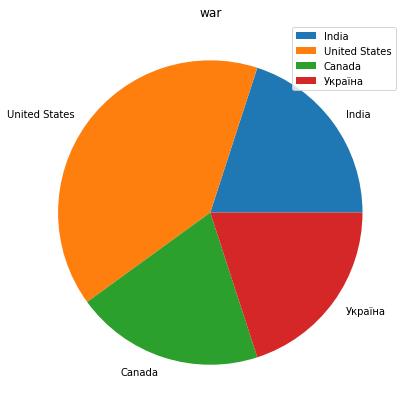

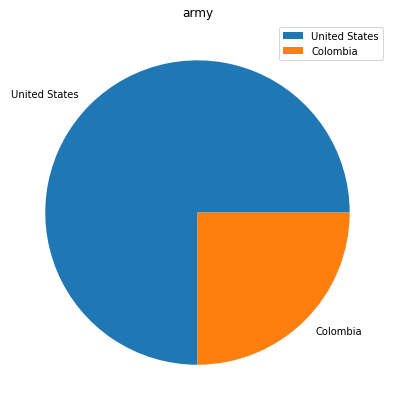

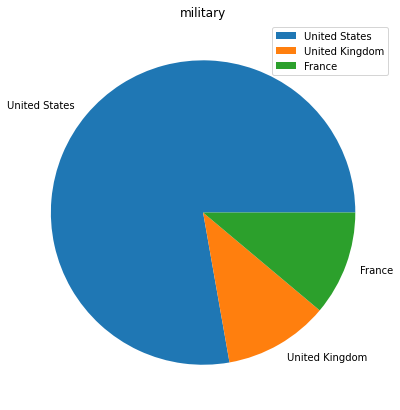

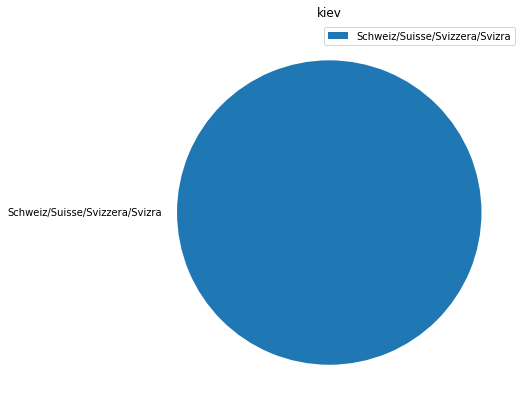

C:\Users\adesa\AppData\Local\Temp/ipykernel_14980/1779459821.py:4: MatplotlibDeprecationWarning:

normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 

No handles with labels found to put in legend.


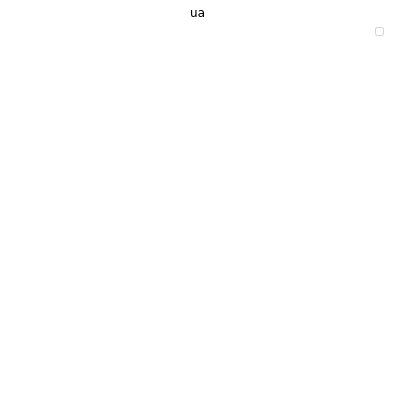

No handles with labels found to put in legend.


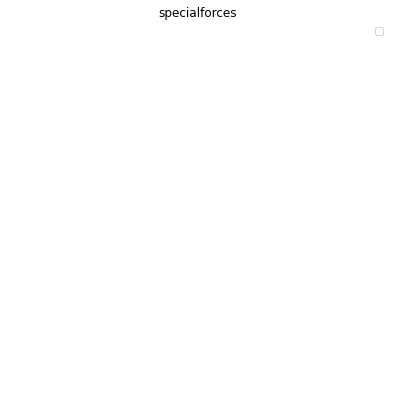

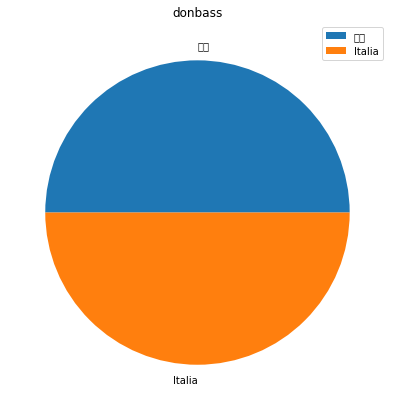

No handles with labels found to put in legend.


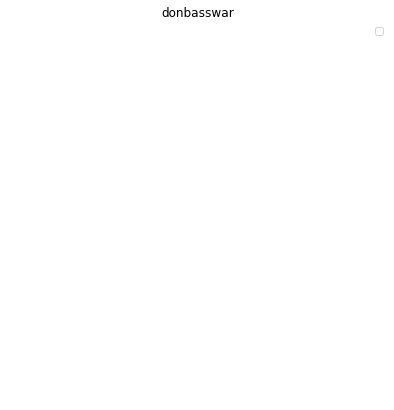

No handles with labels found to put in legend.


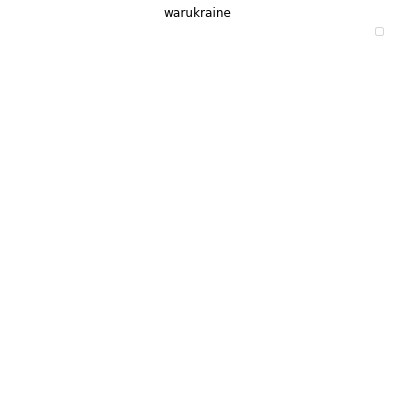

C:\Users\adesa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 20013 missing from current font.

C:\Users\adesa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 22269 missing from current font.

C:\Users\adesa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 45824 missing from current font.

C:\Users\adesa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 54620 missing from current font.

C:\Users\adesa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 48124 missing from current font.

C:\Users\adesa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 44397 missing from current font.

C:\Users\adesa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 2476 missing from current font.

C:\Users\adesa\anacon

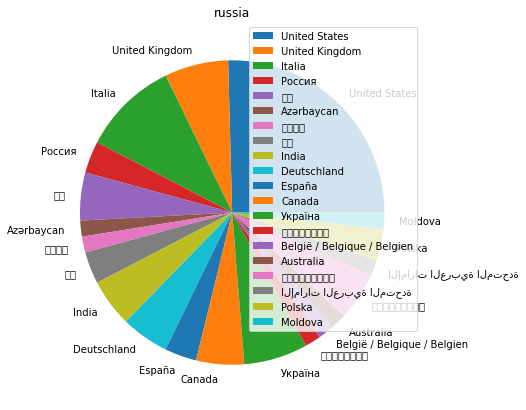

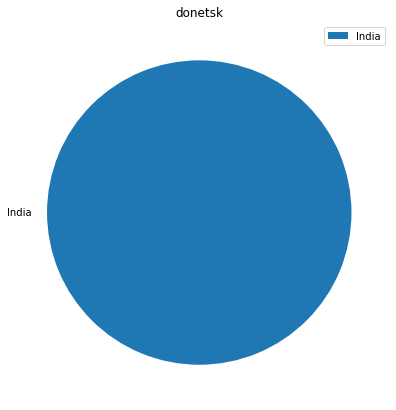

No handles with labels found to put in legend.


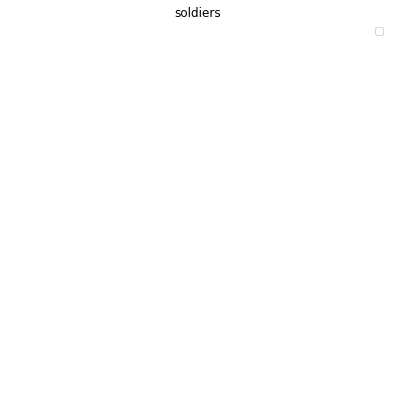

No handles with labels found to put in legend.


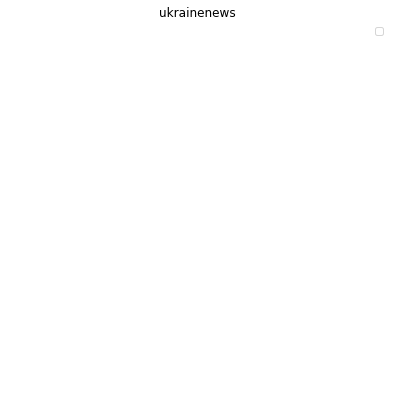

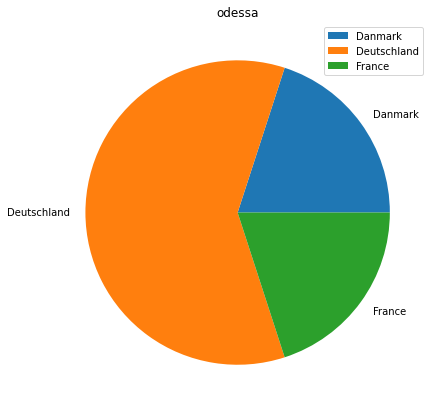

No handles with labels found to put in legend.


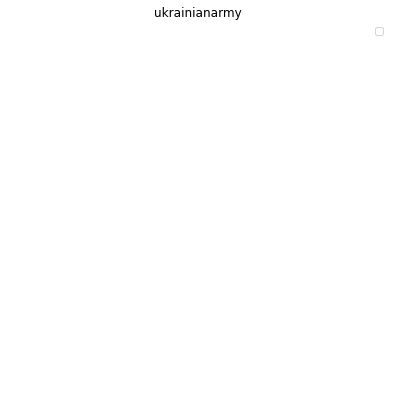

No handles with labels found to put in legend.


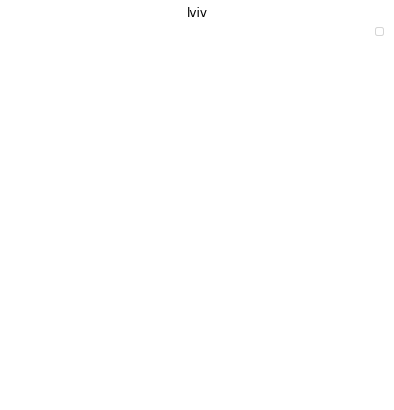

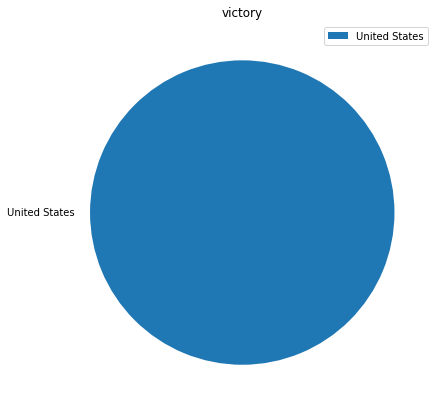

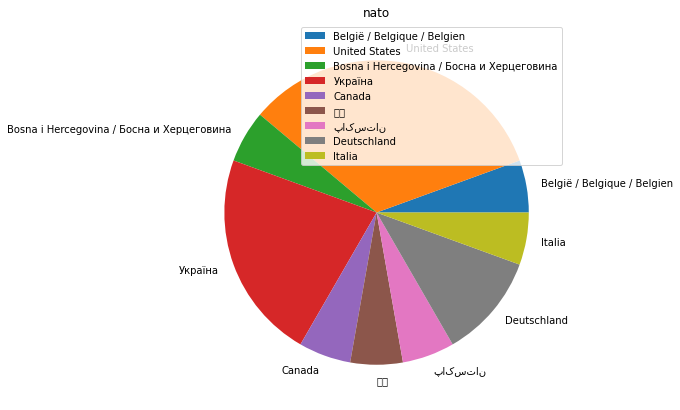

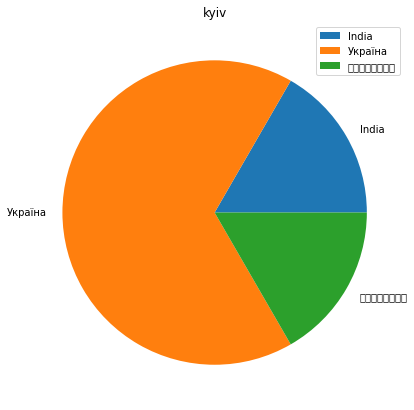

No handles with labels found to put in legend.


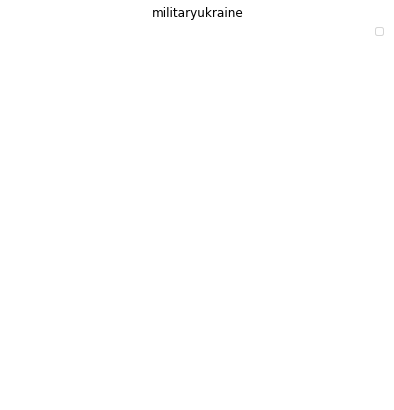

In [224]:
for key, value in dictOfhashtags_location.items():
    fig = plt.figure(figsize =(10, 7))
    plt.title(key)
    plt.pie(value.values(), labels = value.keys())
    plt.legend()
    plt.show()

3. Use other pie chart illustrations to show the language of the tweets for each of the above main hashtags.

In [ ]:
dictOfhashtags_language = { i : {} for i in hashtags }

for index, row in tweets.iterrows():
    for hashtag in ast.literal_eval(row.loc['hashtags']):
        if hashtag.lower() in dictOfhashtags_language:
            if row.loc['language'] not in dictOfhashtags_language[hashtag.lower()].keys():
                dictOfhashtags_language[hashtag.lower()][row.loc['language']] = 1
            else:
                dictOfhashtags_language[hashtag.lower()][row.loc['language']] += 1

In [ ]:
print(dictOfhashtags_language)

{'ukrainewar': {'en': 490, 'it': 13, 'ja': 8, 'ro': 2, 'und': 56, 'de': 15, 'el': 1, 'es': 5, 'fr': 20, 'hi': 22, 'in': 2, 'ru': 13, 'tr': 6, 'uk': 5, 'ur': 1, 'ca': 2, 'pl': 3, 'nl': 1, 'ko': 1, 'da': 1, 'ta': 1, 'sr': 1, 'fi': 1, 'zh': 2, 'hu': 1, 'cs': 1}, 'war': {'en': 350, 'ca': 1, 'ja': 12, 'und': 35, 'fr': 6, 'it': 9, 'es': 15, 'tr': 4, 'uk': 10, 'in': 2, 'de': 6, 'sv': 4, 'ru': 11, 'bn': 2, 'pl': 8, 'pt': 1, 'el': 1, 'da': 4, 'no': 1, 'hi': 1, 'ro': 1, 'fa': 1}, 'army': {'es': 13, 'en': 77, 'und': 4, 'ja': 31, 'ru': 1, 'ko': 5, 'pt': 4, 'in': 8, 'gu': 1, 'ur': 1, 'de': 1, 'hi': 5, 'sl': 1, 'ht': 2, 'fr': 2, 'nl': 1, 'fa': 1, 'bn': 1, 'si': 1, 'ar': 2, 'it': 1}, 'military': {'en': 112, 'und': 6, 'fr': 19, 'es': 1, 'hi': 1, 'pt': 1, 'zh': 2, 'hu': 1, 'no': 1, 'ja': 1, 'in': 4, 'tl': 1, 'ca': 1, 'fa': 1}, 'kiev': {'ru': 2, 'en': 30, 'und': 14, 'it': 39, 'tr': 9, 'pt': 7, 'uk': 2, 'fr': 22, 'es': 18, 'nl': 1, 'ro': 1, 'in': 1, 'ja': 1, 'de': 1, 'hi': 1, 'ar': 2}, 'ua': {'uk': 6, 'r

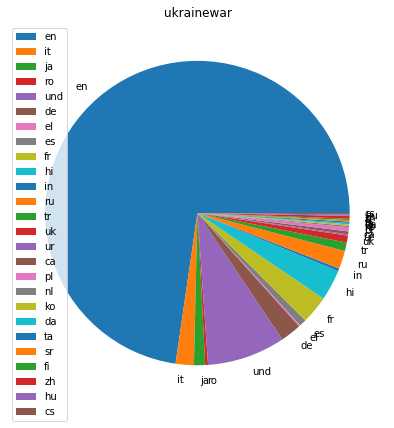

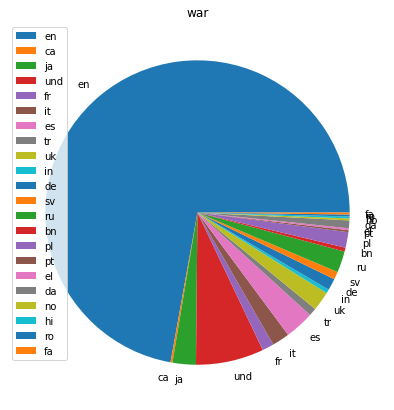

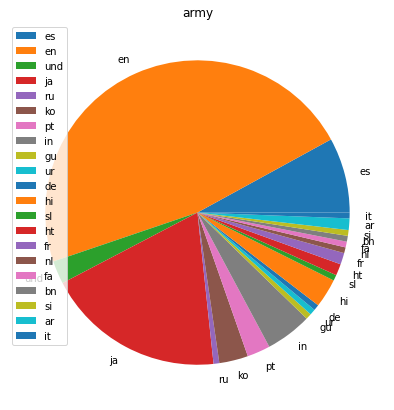

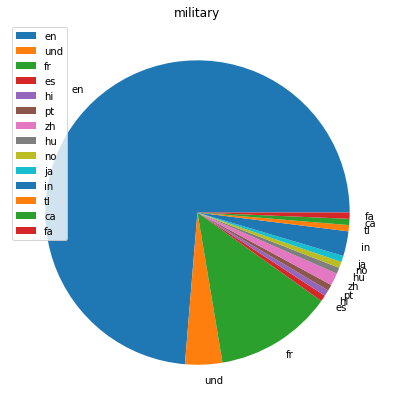

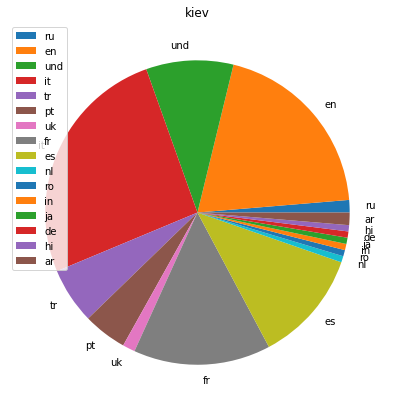

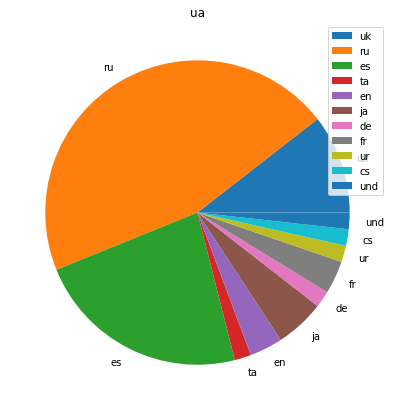

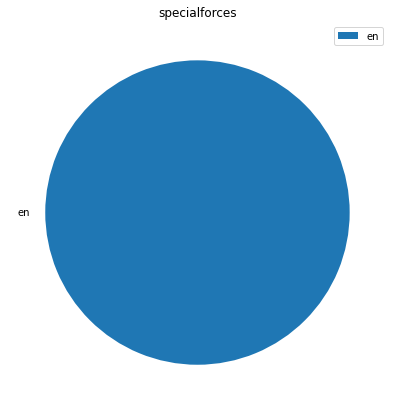

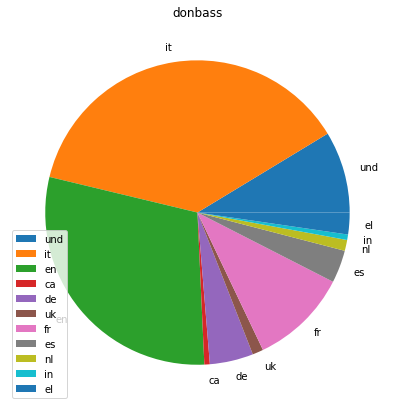

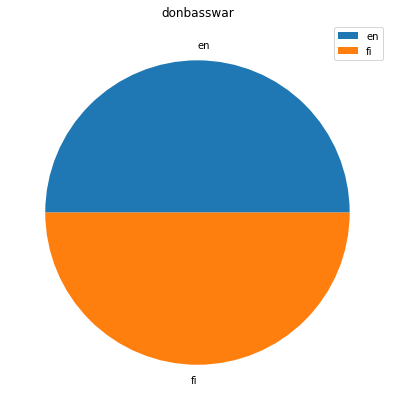

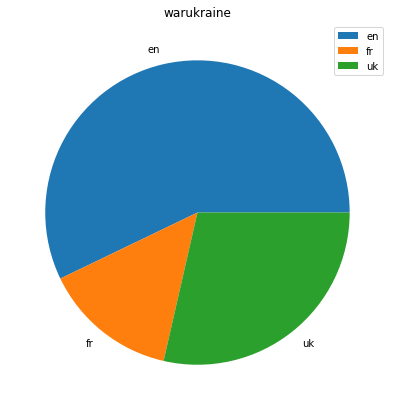

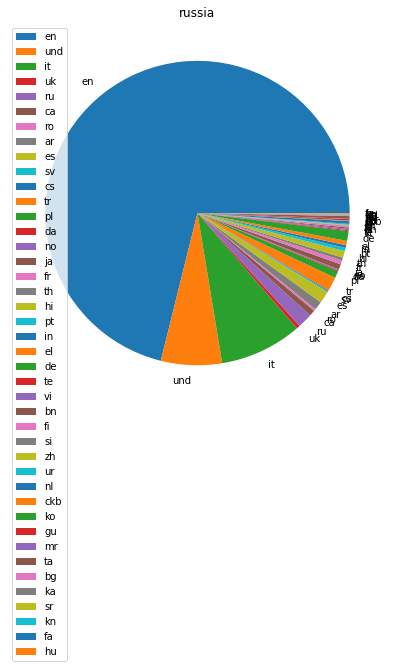

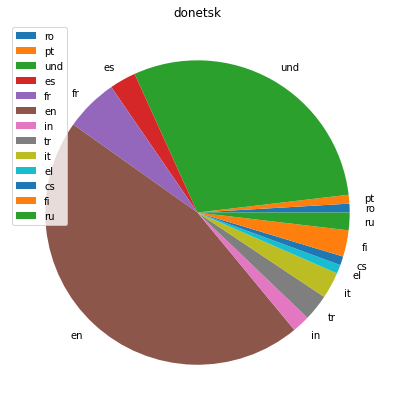

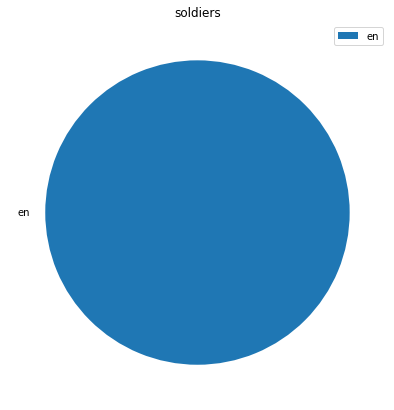

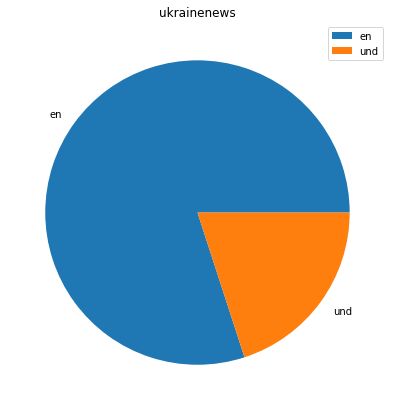

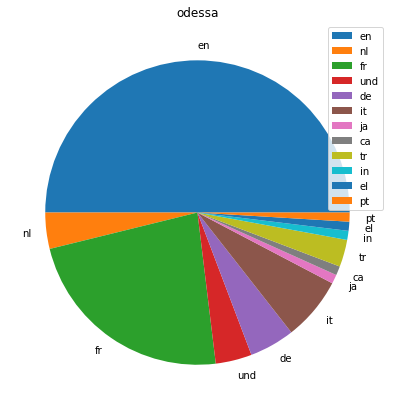

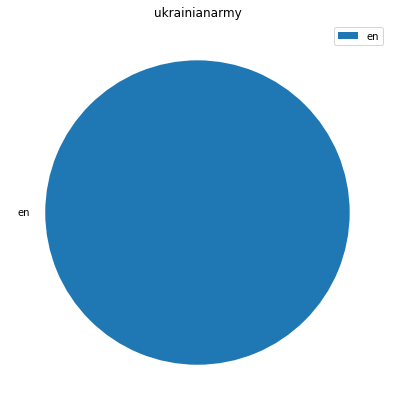

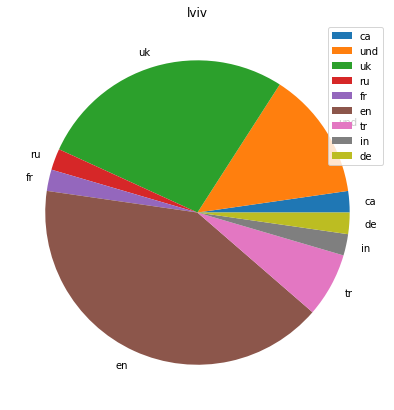

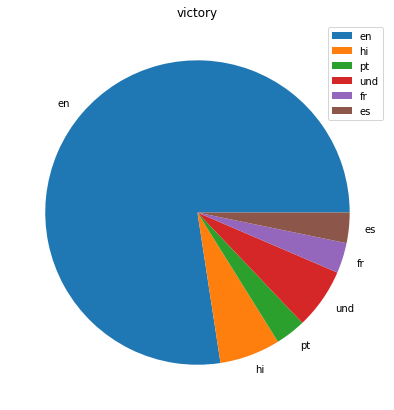

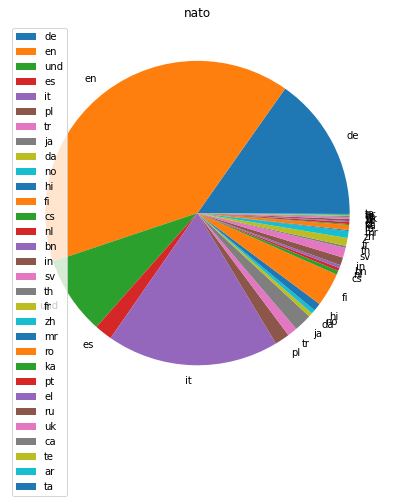

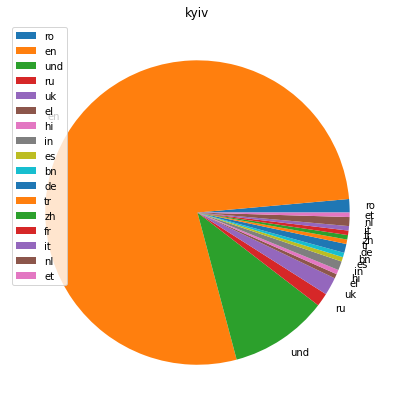

C:\Users\adesa\AppData\Local\Temp/ipykernel_14980/3693126674.py:4: MatplotlibDeprecationWarning:

normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 

No handles with labels found to put in legend.


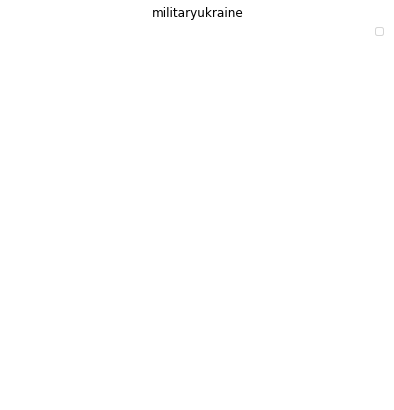

In [ ]:
for key, value in dictOfhashtags_language.items():
    fig = plt.figure(figsize =(10, 7))
    plt.title(key)
    plt.pie(value.values(), labels = value.keys())
    plt.legend()
    plt.show()

4. Use VADER tool (https://github.com/cjhutto/vaderSentiment), which output sentiment in terms of POSITIVE, NEGATIVE and NEUTRAL to determine the sentiment of each tweet of the dataset. Then represent the sentiment of each tweet as a point in the ternary plot.

In [ ]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentences = [text for text in tweets['text']]
analysis = []

analyzer = SentimentIntensityAnalyzer()
for sentence in sentences:
    analysis.append(analyzer.polarity_scores(sentence))

In [ ]:
#print(sentences)

In [ ]:
#print(analysis)

In [ ]:
df_analysis = pd.DataFrame(analysis)
print(df_analysis)

        neg    neu    pos  compound
0     0.067  0.933  0.000   -0.2500
1     0.078  0.922  0.000   -0.4215
2     0.000  1.000  0.000    0.0000
3     0.000  1.000  0.000    0.0000
4     0.221  0.779  0.000   -0.9153
...     ...    ...    ...       ...
4989  0.455  0.545  0.000   -0.9777
4990  0.241  0.675  0.084   -0.8957
4991  0.134  0.866  0.000   -0.5719
4992  0.123  0.815  0.062   -0.3612
4993  0.130  0.870  0.000   -0.4588

[4994 rows x 4 columns]


In [ ]:
! pip install plotly

In [ ]:
import plotly.express as px

df = pd.DataFrame({'neg':df_analysis['neg'], 'neu':df_analysis['neu'], 'pos':df_analysis['pos']})
fig = px.scatter_ternary(df, a="neg", b="neu", c="pos")
fig.show()